<a href="https://colab.research.google.com/github/smjason0502/python-deep-learning-pytorch/blob/main/2%EC%A3%BC%EC%B0%A8_%EC%8A%A4%ED%84%B0%EB%94%94(%ED%8C%8C%EC%9D%B4%EC%8D%AC_%EB%94%A5%EB%9F%AC%EB%8B%9D_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

예제 2-1 사람의 손글씨 데이터인 MNIST를 이용해 Multi Layer Perceptron(MLP)설계하기

1. 모듈 임포트하기
2. 딥러닝모델을 설계할 때 활용하는 장비 확인하기
3. MNIST 데이터 다운로드하기(Trainset, Testset분리하기)
4. 데이터 확인하기(1)
5. 데이터 확인하기(2)
6. MLP(MultiLayerPerceptron) 모델설계하기
7. Optimizer, ObjectiveFunction 설정하기
8. MLP 모델 학습을 진행하면서 학습 데이터에 대한 모델 성능을 확인하는 함수 정의하기
9. 학습되는 과정 속에서 검증데이터에 대한 모델의 성능을 확인하는 함수 정의하기
10. MLP 학습을 실행하면서 Train, Test set의 Loss 및 Test set Accuracy 확인하기


In [4]:
# 1. Module Import
import numpy as np #(1)
import matplotlib.pyplot as plt #(2)
import torch #(3)
import torch.nn as nn #(4)
import torch.nn.functional as F #(5)
from torchvision import transforms, datasets #(6)


In [5]:
# 2. 딥러닝모델을 설계할때 활용하는 장비 확인
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, 'Device:',DEVICE)
# Using PyTorch version: 1.5.0+cu101 Device: cuda

Using PyTorch version: 2.4.0+cu121 Device: cpu


In [6]:
BATCH_SIZE= 32  #(1)
EPOCHS = 10  #(2)
# BATCH_SIZE: MLP 모델을 학습할때 필요한 데이터 개수의 단위입니다.
#Epoch은 사용자가 정의하는 하이퍼파라미터이며 Mini- Batch의 데이터 개수를 지정해준다면 Iteration은 전체 데이터 개수에서 1개의 Mini Batch를 구성하고 있는 데이터 개수를 나눠준 몫 만큼 Iteration을 진행합니다.

In [8]:
# 3. MNIST 데이터 다운로드 (Train set, Test set 분리하기)

train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())
test_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = False,
                               transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)
## root: 데이터가 저장될 장소를 지정
## train: 대상 데이터가 MLP모델을 학습하기 위해 이용하는 학습용 데이터인지, MLP모델의 학습된 이후 성능을 검증하기 위한 검증용 데이터인지를 지정합니다
## download: 해당 데이터를 인터넷상에서 다운로드해 이용할 것인지를 지정
## transform : 사람의 손글씨 데이터인 MNIST는 이미지 데이터입니다


In [9]:
## 4. 데이터 확인하기(1)
for (X_train, y_train) in train_loader:
  print('X_train:', X_train.size( ), 'type:', X_train.type())
  print('y_train:', y_train.size( ), 'type:', y_train.type())
  break
## X_train: torch. Size([32, 1, 28, 28]) type: torch.FloatTensor
## y_train: torch. Size([32]) type: torch.LongTensor
## X_train: 32개의 이미지 데이터가 1개의 Mini- Batch를 구성하고 있고 가로 28개, 세로 28개의 픽셀로 구성돼 있으며 채널이 1
## y_train: 32개의 이미지 데이터 각각에 label값이 1개씩 존재하기 때문에 32개의 값을 갖고 있음

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


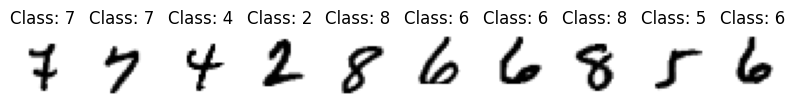

In [10]:
## 5. 데이터 확인하기(2)
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis ('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
  plt.title('Class: ' + str(y_train[i].item()))

In [15]:
## 6. MLP(Multi Layer Perceptron) 모델 설계
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(28*28, 512)
    self.fc2 = nn.Linear(512, 256)
    self.fc3 = nn.Linear(256, 10)
  def forward(self, x):
    x = x.view(-1, 28 * 28)
    x = self.fc1(x)
    x = F.sigmoid(x)
    x = self.fc2(x)
    x = F.sigmoid(x)
    x = self.fc3(x)
    x = F. log_softmax(x, dim = 1)
    return x


In [16]:
## 7. Optimizer, Objective Function 설정하기

model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(),lr=0.01, momentum =0.5)
criterion = nn.CrossEntropyLoss()

print(model)

# Net (
#    (fc1) Linear(in_features=784, out_features=512, bias=True)
#    (fc2) Linear(in_features=512, out_features=256, bias=True)
#    (fc3) Linear(in_features=256, out_features=10, bias=True)
#)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=10, bias=True)
)


In [19]:
## 8. MLP 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의
def train(model, train_loader, optimizer, log_interval):
  model.train()
  for batch_idx,(image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss. backward()
    optimizer.step()

    if batch_idx % log_interval == 0:
      print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
          Epoch, batch_idx * len(image), len(train_loader.dataset), 100. * batch_idx / len(train_loader),loss.item()))

In [20]:
## 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct =0

    with torch.no_grad():
      for image, label in test_loader:
          image = image.to(DEVICE)
          label = label.to(DEVICE)
          output = model(image)
          test_loss += criterion(output, label).item()
          prediction = output.max(1, keepdim = True)[1]
          correct += prediction.eq(label.view_as(prediction)).sum().item()
    test_loss/= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy


In [22]:
## 10. . MLP 학습을 실행하면서 Train , Testvset의 Loss 및 Test set Accuracy를 확인
for Epoch in range(1,EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".
    format(Epoch, test_loss, test_accuracy))


Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.328904
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.336125
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.321580
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.295601
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.317040
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.275945
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.258958
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.270050
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.275874
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.243929

[EPOCH: 1], 	Test Loss: 0.0697, 	Test Accuracy: 29.64 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.209803
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.233453
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.241060
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.107970
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 1.836896
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 1.902797
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 1.669516
Train Epoch: 2 [448

학습이 완료됐을때, test_loader 내에 존재하는 데이터의 약 90% 수준의 정확도를 나타내는것 을 확인할 수 있습니다.

```
# 코드로 형식 지정됨
```

